🎁 Bonus: Dashboard-style Summary
Create a simple summary with top insights:

Top 5 countries

Top programming languages

Preferred IDEs (Q9)

Age groups (Q1)

Education levels (Q4)

✅ Summary
Step	Description
📥 Download	Kaggle Survey 2021 Dataset
🔍 Load Data	Use Pandas with read_csv()
🧹 Clean Data	Drop NA, duplicates, and fix formats
🔤 Encode	Convert categorical columns
📊 Analyze	Use value_counts() and groupby()
📈 Visualize	With matplotlib or seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust the path as needed)
df = pd.read_csv('kaggle_survey_2017_2021.csv', low_memory=False)

# Drop the first row (it's a header row repeated)
df = df.iloc[1:]

# Show basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106301 entries, 1 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB
None
      - Time from Start to Finish (seconds)     Q1   Q2         Q3  \
1  2021                                 910  50-54  Man      India   
2  2021                                 784  50-54  Man  Indonesia   
3  2021                                 924  22-24  Man   Pakistan   
4  2021                                 575  45-49  Man     Mexico   
5  2021                                 781  45-49  Man      India   

                    Q4                       Q5          Q6 Q7_Part_1  \
1  Bachelorâ€™s degree                    Other  5-10 years    Python   
2    Masterâ€™s degree  Program/Project Manager   20+ years       NaN   
3    Masterâ€™s degree        Software Engineer   1-3 years    Python   
4      Doctoral degree       Research Scientist   20+ years    Python   
5      Doctoral degree                    Other 

In [6]:
#data cleaning
# Check missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Drop columns with too many NaNs
df_cleaned = df.dropna(thresh=len(df)*0.4, axis=1)

# Fill remaining missing values with a placeholder
df_cleaned.fillna("Not Specified", inplace=True)

# Drop duplicate rows (if any)
df_cleaned.drop_duplicates(inplace=True)

Q16_Part_17      106301
Q34_B_Part_16    106301
Q9_Part_12       106301
Q34_A_Part_16    106301
Q32_A_Part_20    106301
Q14_Part_11      106301
Q27_B_Part_11    106301
Q10_Part_16      106301
Q19_Part_5       106301
Q32_B_Part_20    106301
dtype: int64


C:\Users\Manzar\AppData\Local\Temp\ipykernel_2884\2163891556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna("Not Specified", inplace=True)
C:\Users\Manzar\AppData\Local\Temp\ipykernel_2884\2163891556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


In [7]:
#🔤 Step 2: Encode Categorical Variables

# Example: Encode 'Q3' (Country) with label encoding
df_cleaned['Q3_Code'] = df_cleaned['Q3'].astype('category').cat.codes

C:\Users\Manzar\AppData\Local\Temp\ipykernel_2884\931887291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Q3_Code'] = df_cleaned['Q3'].astype('category').cat.codes


Q3
India                       23892
United States of America    12677
Other                        5531
China                        3502
Russia                       3299
Name: count, dtype: int64
Q7_Part_1
Python           65906
Not Specified    35888
Name: count, dtype: int64


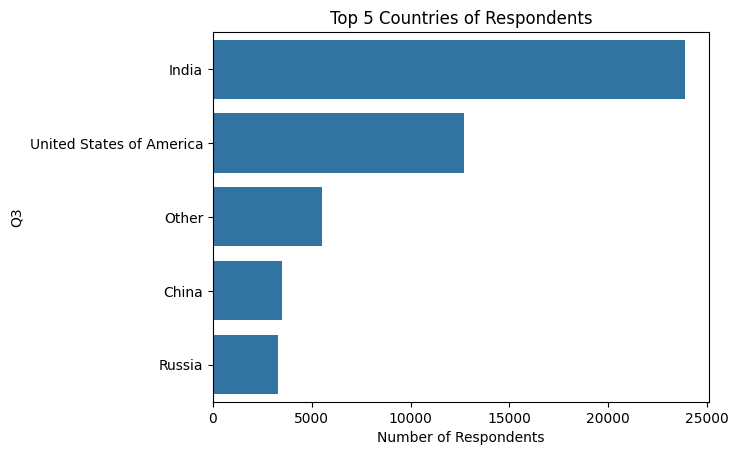

In [8]:
#📊 Step 3: Generate Insights

# Top 5 countries with most respondents
top_countries = df_cleaned['Q3'].value_counts().head(5)
print(top_countries)

# Preferred programming languages
top_languages = df_cleaned['Q7_Part_1'].value_counts().head(5)
print(top_languages)

# Visualization
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 5 Countries of Respondents")
plt.xlabel("Number of Respondents")
plt.show()

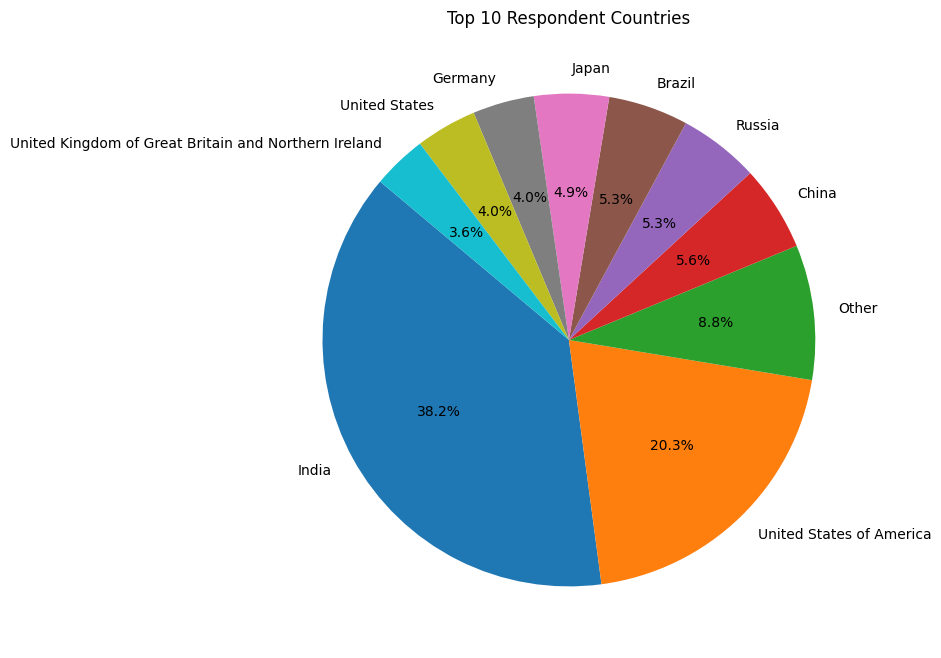

In [9]:
##1. 🌍 Pie Chart: Respondents by Country

country_counts = df_cleaned['Q3'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Respondent Countries")
plt.show()

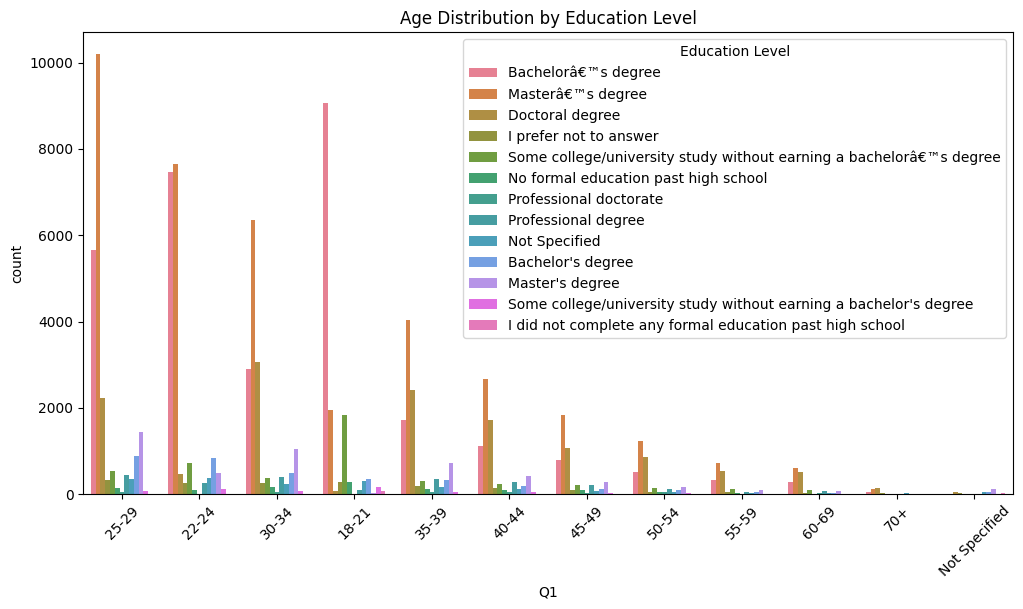

In [10]:
#2. 🎨 Countplot: Education Level vs Age

plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, x='Q1', hue='Q4', order=df_cleaned['Q1'].value_counts().index)
plt.title('Age Distribution by Education Level')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()

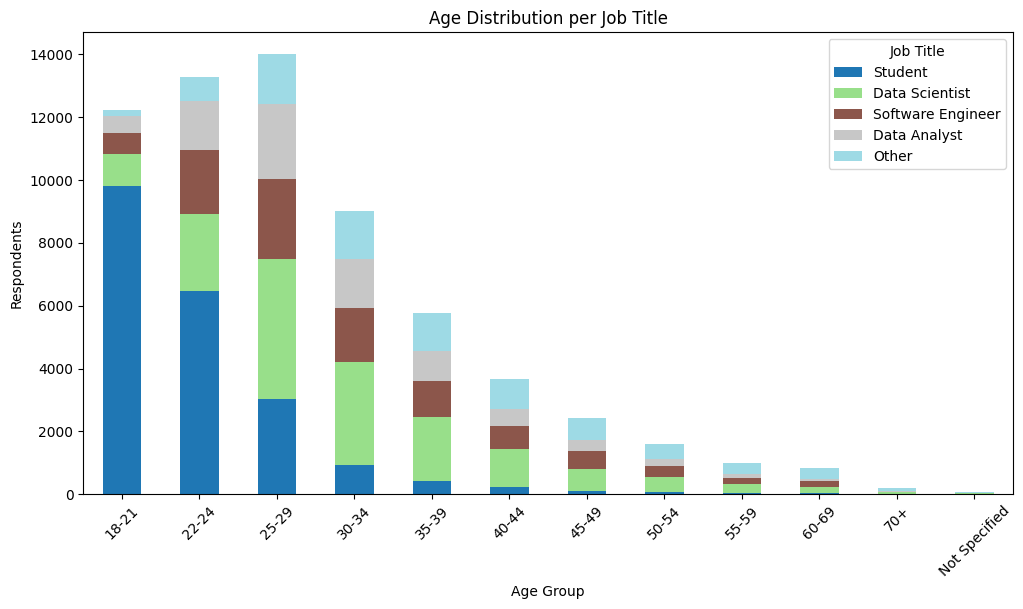

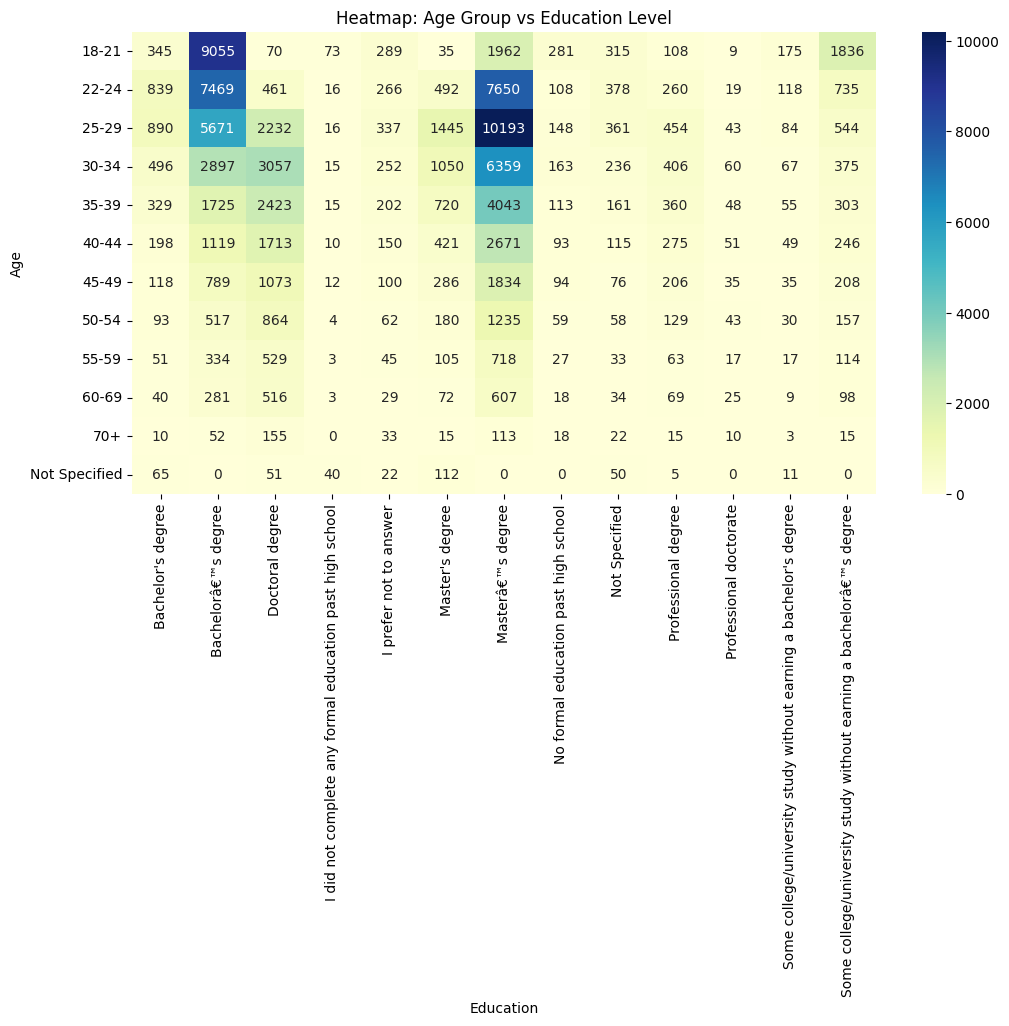

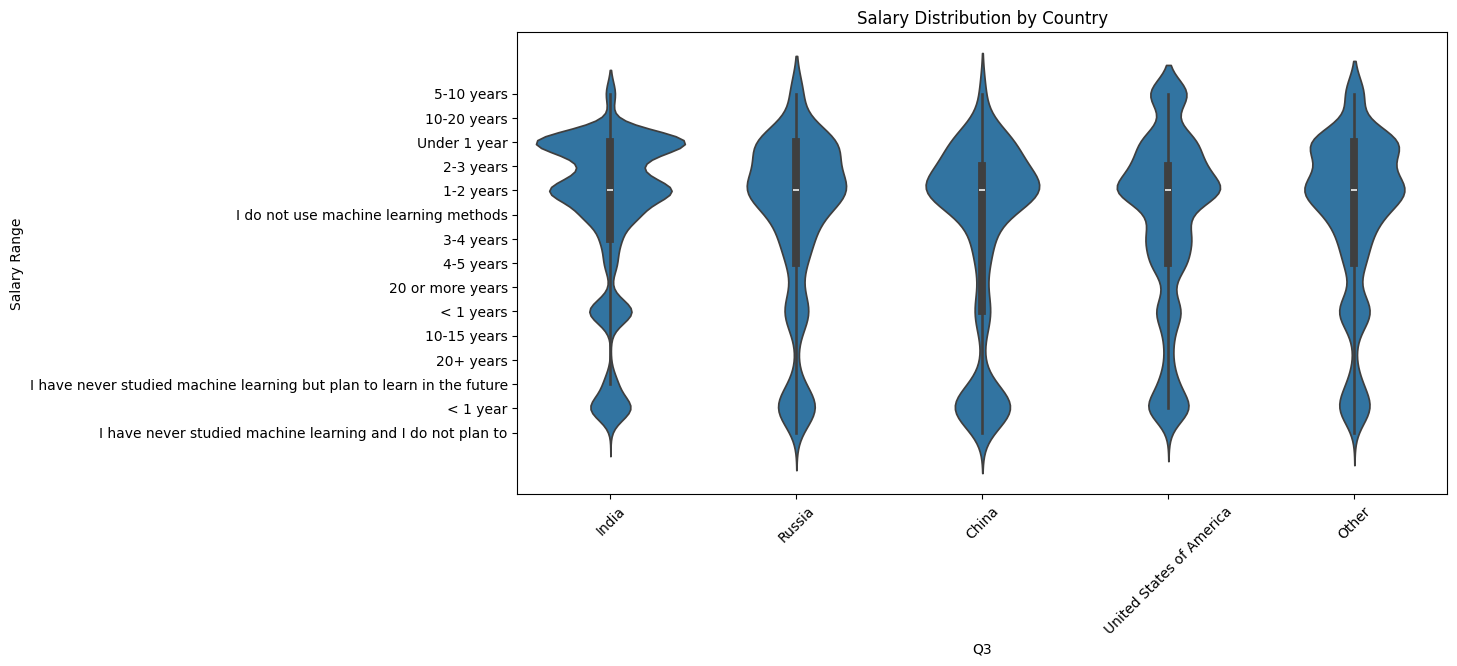

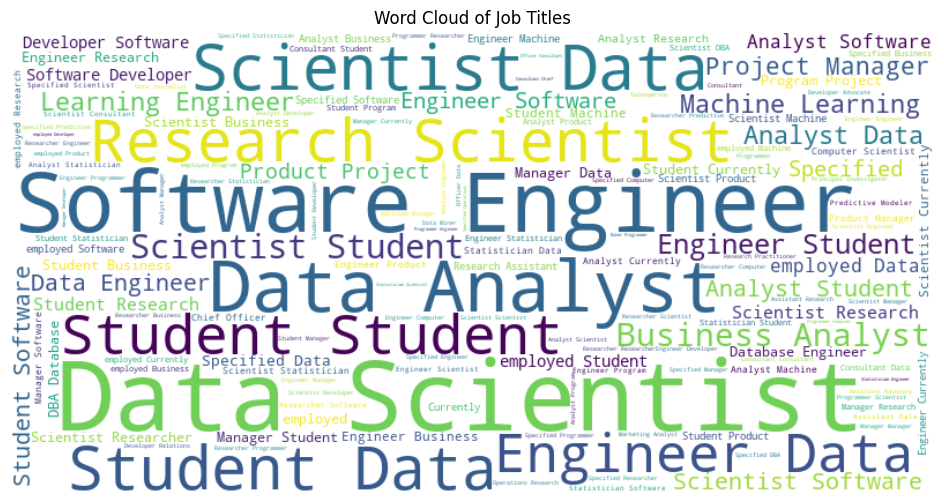

In [13]:
#3. 💼 Stacked Bar Plot: Job Title vs Age

job_age = pd.crosstab(df_cleaned['Q5'], df_cleaned['Q1'])
job_age = job_age.loc[job_age.sum(axis=1).sort_values(ascending=False).head(5).index]

job_age.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Age Distribution per Job Title')
plt.ylabel('Respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Job Title')
plt.show()
#4. 🎓 Heatmap: Age vs Education

age_edu = pd.crosstab(df_cleaned['Q1'], df_cleaned['Q4'])
plt.figure(figsize=(12,6))
sns.heatmap(age_edu, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap: Age Group vs Education Level")
plt.ylabel("Age")
plt.xlabel("Education")
plt.show()
#5. 💰 Violin Plot: Salary vs Country (Top 5 only)

# First filter to top 5 countries and known salary values
top5_countries = df_cleaned['Q3'].value_counts().head(5).index
df_salary = df_cleaned[df_cleaned['Q3'].isin(top5_countries) & (df_cleaned['Q15'] != 'Not Specified')]

plt.figure(figsize=(12,6))
sns.violinplot(data=df_salary, x='Q3', y='Q15')
plt.title("Salary Distribution by Country")
plt.xticks(rotation=45)
plt.ylabel("Salary Range")
plt.show()
#6. 🧪 Word Cloud: Job Titles

from wordcloud import WordCloud

text = ' '.join(df_cleaned['Q5'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()

